# Exercise 4: Interventions

Here we will practice altering the starting conditions and structure of our SIR model in order to represent what will happen when we add interventions. Each version of our model represents a different modeling scenario. By comparing different scenarios, we can imagine different ways that the outbreak will occur under different conditions.

In [6]:
# Load libraries
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt

# Use scipy.optimize.minimize to mnimizes sum of squared errors function
from scipy.optimize import minimize

In [ ]:
%matplotlib inline

In [8]:
# Load plague Data
plague_dat = pd.read_csv('../../plague_data.csv')
plague_dat['time'] = plague_dat.index.values

plague_dat.head()

,Week_of_year,Deaths,time
0,39,31,0
1,40,18,1
2,41,12,2
3,42,9,3
4,43,13,4


In [9]:
# Define a function for numerically integrating the SIR model
def sir_model(state, time, parameters):
    # Unpack Parameters
    
    # Calculate force of infection
    lambd = beta * I / N
    
    # Calculate derivatives
    #dS = 
    #dI = 
    #dR = 
    
    # Return derivative
    return [dS, dI, dR]
    return [dS, dI, dR]

In [10]:
# Using the fit values from Exercise 3 before, generate a "baseline solution" to the model

# Using the optimized parameter values from before
parameters = {'beta': 2.67546942, 'gamma': 2.20012301}

# Define times - start at week 10
times = np.arange(10, 55, 1)


# Initial state values
initial_state_values = [55000 - 1, 1, 0]

# Integrate, fill in odeint with appropriate arguments
# sir_fit = odeint(...)


# Part 1: Quarantine

Suppose we are able to quarantine a certain fraction of susceptibles in the population before the outbreak starts, such that they never become infected.

We represent this by removing a fraction of the susceptible population at the start, and see whether the outbreak takes off. Let `p_quarantine` = fraction of susceptibles who are quarantined at the start. Those who are quarantined never interact with the other people in the population, so they are effectively removed from the population.

Start by letting `p_quarantine` = .25:

In [11]:
# Using the optimized parameter values from before
parameters = {'beta': 2.67546942, 'gamma': 2.20012301}

# Define times - start at week 10
times = np.arange(10, 55, 1)

# Adjust quarantine proportion p_quarantine here:
p_quarantine = 0.25

# Initial state values
initial_state_values = [55000 * (1 - p_quarantine) - 1, 1, 0]

# Solve the quaratine model, fill in odeint with appropriate arguments
# sir_quarantine = odeint(...)

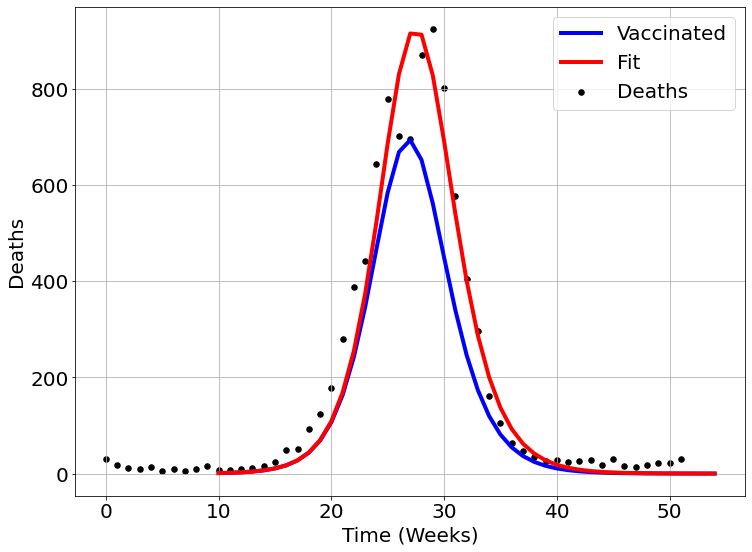

In [12]:
# Create a plot


## Question: Cases averted through quarantine
How many people became infected overall?

13736.830630333065

How does that compare to the number of people who became infected before?

18314.532053687297

## Question : stopping an outbreak with quarantine
Try adjusting p_quarantine: how large does it need to be in order to stop an outbreak from occurring?


## Optional question

In this new quarantine scenario, we have altered the structure of our model.

Find an expression for R_0 as a function of beta, gamma, and p_quarantine. Solve for p_quarantine such that R_0 = 1. Compare the value of p_quarantine to the value that you found which was high enough to stop an outbreak from occurring.



## Optional question

Suppose instead of providing perfect protection against plague, the quarantine only 50% effective in providing protection for quarantined people.. What structural changes would we need to make to our model in order to represent this? How do your answers to each of the above questions change in this alternate scenario?

# Part 2 (optional exercise): Treatment of infected individuals
Suppose that treatment decreases the amount of infectious time by 25%. 
The way we represent this is by dividing the "Infected" compartment into two, where one receives the treatment and the other does not. In the treated compartment, gamma -> gamma/(.75) (recovery rate increases by 1/.75).

How many cases need to be treated in order to prevent an outbreak?

Start by defining a new model with the treated compartment. This time there are four state variables, where we've added I_t to represent the number of infected people on treatment:

In [16]:
def sir_model_treatment(state, time, parameters):
    # Calculate force of infection
    #lambd = 

    # Calculate derivatives
    #dS =
    # Notice now that there is this new compartment of people who receive treatment
    #dI_t =
    # And this compartment where people do not receive treatment
    #dI = 
    #dR = 

    return [dS, dI, dI_t, dR]

p_treated is the probability that an individual receives treatment. Start by setting that equal to 0.25:

In [17]:
parameters = [2.559449, 2.109450, 0.25]

times = np.arange(10, 55, 1)

initial_state_values = [54999, 1, 0, 0]

# Integrate, fill in odeint with appropriate arguments
#sir_treated = odeint(...)


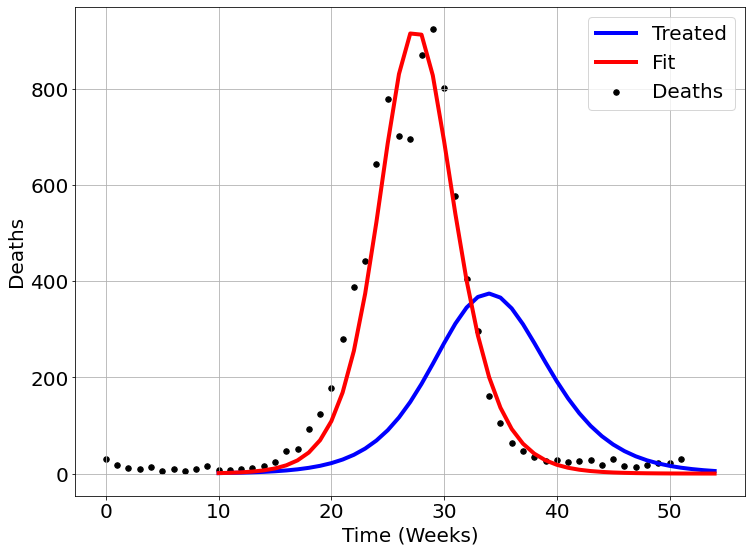

In [18]:
# Create a plot


## Question: Cases averted through treatment
How many people became infected overall when we add treatment?

12968.476733494168

How does that compare to the number of people who became infected in the original scenario?

18314.532053687297

## Question: stopping an outbreak with treatment
Try adjusting the parameters in the treatment scenario - what coverage is needed to stop an epidemic altogether?


## Optional question

In this new treatment scenario, we have altered the structure of our model.

Find an expression for R_0 as a function of beta, gamma, p_treatment, and the factor which changes the rate at which infected people recover with treatment. Solve for p.treatment such that R_0 = 1. Compare the value of p.treatment to the value that you found which was high enough to stop an outbreak from occurring.



## Optional question

Suppose that treatment does not shorten the duration of the infectious period, and instead it reduces the per-contact rate of transmission (beta) by 50%. What structural changes would we need to make to our model in order to represent this? How do your answers to each of the above questions change in this alternate scenario?
